In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import missingno as msno
import scipy
from fancyimpute import KNN

Using TensorFlow backend.


In [2]:
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 0.21.3.


In [3]:
import os
os. getcwd()

'/Users/hananather'

In [4]:
import os
os.chdir('/Users/hananather/desktop/algae_blooms')
os. getcwd()

'/Users/hananather/Desktop/algae_blooms'

In [5]:
data = pd.read_csv('algae_blooms.csv')

# Getting to know the Dataset

In [6]:
data.head()

,season,size,speed,mxPH,mnO2,Cl,NO3,NH4,oPO4,PO4,Chla,a1,a2,a3,a4,a5,a6,a7
0,winter,small,medium,8.00,9.8,60.800,6.238,578.00000,105.000,170.00000,50.0,0.0,0.0,0.0,0.0,34.2,8.3,0.0
1,spring,small,medium,8.35,8.0,57.750,1.288,370.00000,428.750,558.75000,1.3,1.4,7.6,4.8,1.9,6.7,0.0,2.1
2,autumn,small,medium,8.10,11.4,40.020,5.330,346.66699,125.667,187.05701,15.6,3.3,53.6,1.9,0.0,0.0,0.0,9.7
3,spring,small,medium,8.07,4.8,77.364,2.302,98.18200,61.182,138.70000,1.4,3.1,41.0,18.9,0.0,1.4,0.0,1.4
4,autumn,small,medium,8.06,9.0,55.350,10.416,233.70000,58.222,97.58000,10.5,9.2,2.9,7.5,0.0,7.5,4.1,1.0


In [7]:
data.shape

(340, 18)

Given our lack of understanding of this dataset, it would be a good idea to investigate some basic statistical propoerties of the data we are working with to get a better understanding. 
What are the features? 

What are the expected types (int, float, string, boolean)?

Is there obvious missing data (values that Pandas can detect)?

Is there other types of missing data that’s not so obvious (can’t easily detect with Pandas)?

$$
E(Y_i) =\beta_0 + \beta_1x_{i1}+ ... +\beta_px_{ip}
$$

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 18 columns):
season    340 non-null object
size      340 non-null object
speed     340 non-null object
mxPH      338 non-null float64
mnO2      338 non-null float64
Cl        324 non-null float64
NO3       338 non-null float64
NH4       338 non-null float64
oPO4      338 non-null float64
PO4       333 non-null float64
Chla      317 non-null float64
a1        340 non-null float64
a2        340 non-null float64
a3        340 non-null float64
a4        340 non-null float64
a5        340 non-null float64
a6        340 non-null float64
a7        340 non-null float64
dtypes: float64(15), object(3)
memory usage: 47.9+ KB


In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
mxPH,338.0,7.997293,0.578319,5.600,7.75000,8.0450,8.392500,9.700
mnO2,338.0,9.156716,2.313080,1.500,7.92500,9.7000,10.800000,13.400
Cl,324.0,42.517246,44.490604,0.222,10.99375,32.4700,57.750000,391.500
NO3,338.0,3.120784,3.285162,0.000,1.14725,2.3555,4.147500,45.650
NH4,338.0,471.734411,1739.077458,5.000,37.86125,107.3570,244.900002,24064.000
oPO4,338.0,73.091882,114.142052,1.000,13.00000,37.2430,88.106250,1435.000
PO4,333.0,136.685700,149.477313,1.000,40.00000,101.4550,200.231000,1690.000
Chla,317.0,12.796196,18.081336,0.200,2.13300,5.1110,17.200000,110.456
a1,340.0,16.701765,20.998708,0.000,1.50000,7.1000,25.175000,89.800
a2,340.0,7.200882,10.754941,0.000,0.00000,2.8000,10.150000,72.600


The describe function gives a very high level overview of our dataset (NOTE: the categorical variables are not being shown) 

A few things that standout: 

1) standard deviation for 'NH4' is 1739.077458 which is quite large relative to the other features/predictor variables

2) the counts for the numerical predictors are not the same, therefore we have missing values we need to deal with in this data set

The descriptive statistics like mean, median and standard deviation provide us with some information about the distribution of the these variables(NOTE: we will comeback to investiage this more thoroughly).


In [10]:
data.describe(include=[np.object,pd.Categorical]).T


,count,unique,top,freq
season,340,4,winter,90
size,340,3,medium,136
speed,340,3,high,142


In [11]:
data.season.unique()

array(['winter', 'spring', 'autumn', 'summer'], dtype=object)

In [12]:
data['size'].unique()

array(['small', 'medium', 'large'], dtype=object)

In [13]:
data.speed.unique()

array(['medium', 'high', 'low'], dtype=object)

As we can see we have three categorical features in the data set, 'season' with 4 unique values, size with 3 unique values 'small', 'medium', 'large' and speed with 3 unique values of 'low','medium', 'high'.

### Distribution of NaN

In order to deal with the missing data we should first try to assess is data is missing at randon or if is there some sort of trend in the missing values. 

In [14]:
data.isnull().sum()

season     0
size       0
speed      0
mxPH       2
mnO2       2
Cl        16
NO3        2
NH4        2
oPO4       2
PO4        7
Chla      23
a1         0
a2         0
a3         0
a4         0
a5         0
a6         0
a7         0
dtype: int64

In [15]:
data.isnull().mean() *100

season    0.000000
size      0.000000
speed     0.000000
mxPH      0.588235
mnO2      0.588235
Cl        4.705882
NO3       0.588235
NH4       0.588235
oPO4      0.588235
PO4       2.058824
Chla      6.764706
a1        0.000000
a2        0.000000
a3        0.000000
a4        0.000000
a5        0.000000
a6        0.000000
a7        0.000000
dtype: float64

As we can see majority of our missing values lie in 3 features, 'Cl' is missing  16 (4.7%) of the  values, 'Chla' is missing 23 (6.8%) of the values, and 'PO4' is missing 7 (2%) of the missing values .   

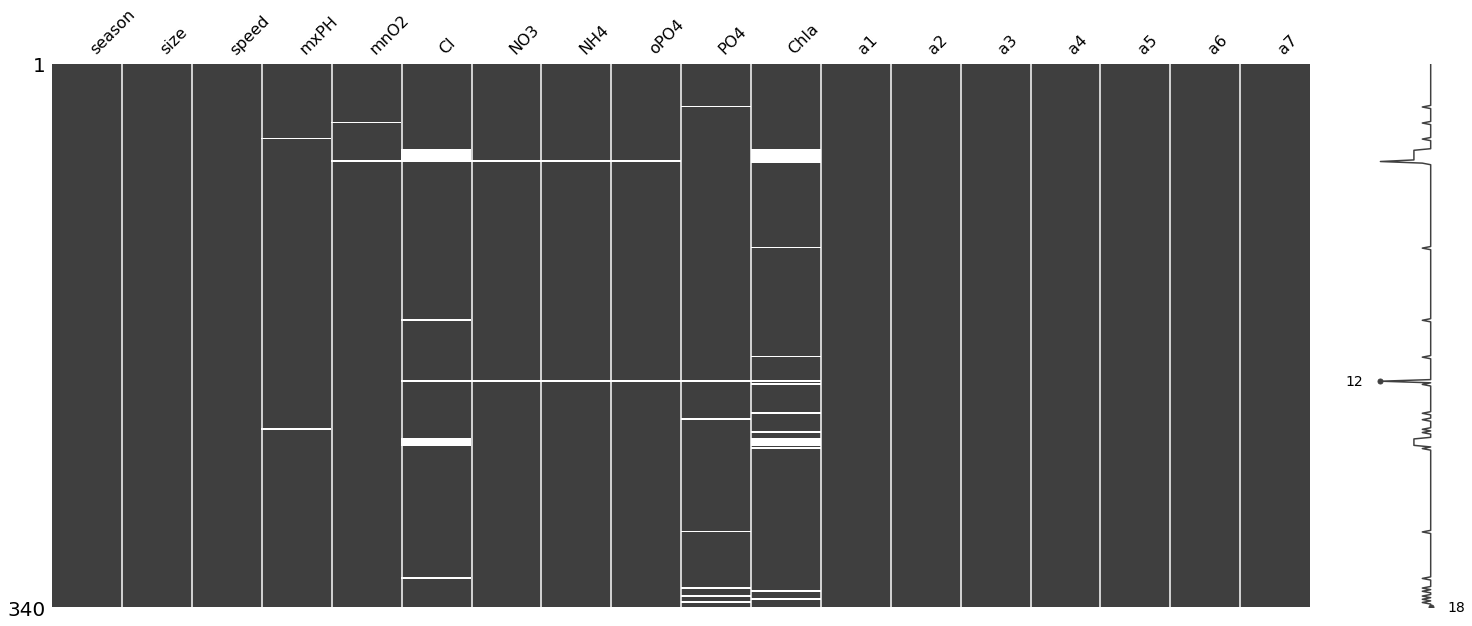

In [16]:
msno.matrix(data)

The plot above give us a visual idication of where the missing values in our dataset are. We can see that there are two observations whiich are missing 6 out the the 11. Furthermore, we can visually see that there seems to be some sort of relationship between some of the missing value of Chla and Cl. There are several tools which we can use to look for correlations between missing values; heatmaps and dendrogram

### Correlations in Missing Values

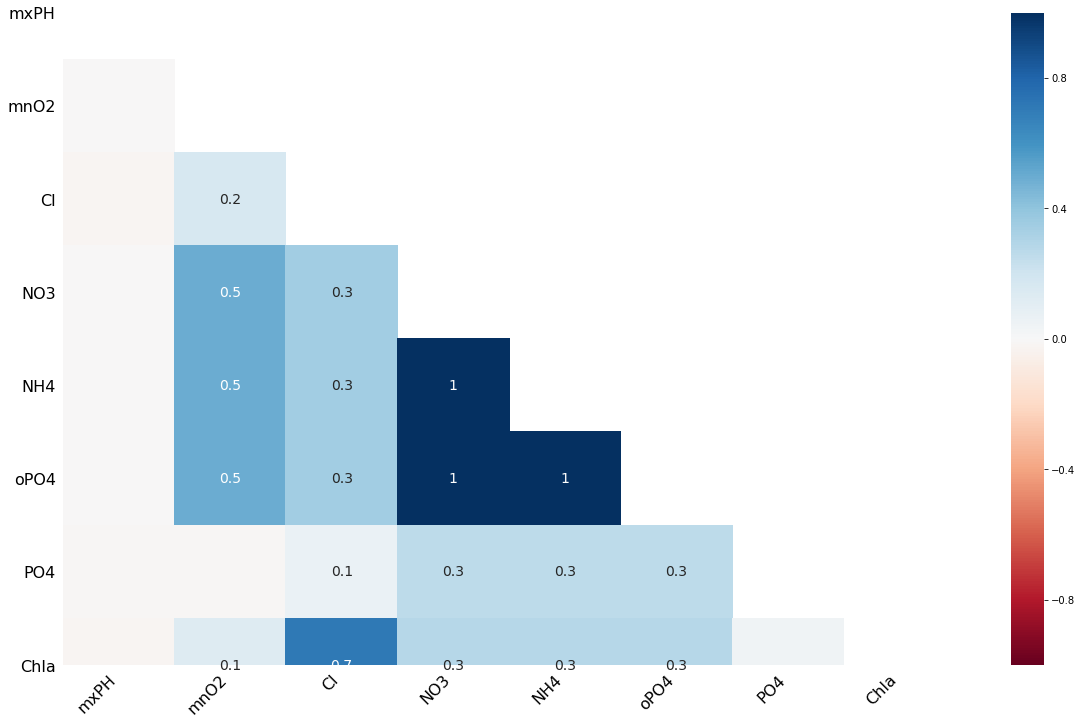

In [17]:
msno.heatmap(data)

Chla and Cl have a correlation of 0.70 when it comes to missing values. The correlations between oPO4, PO4 and NH4 can be ignored in this case because there are only two missing values each for those variables. 

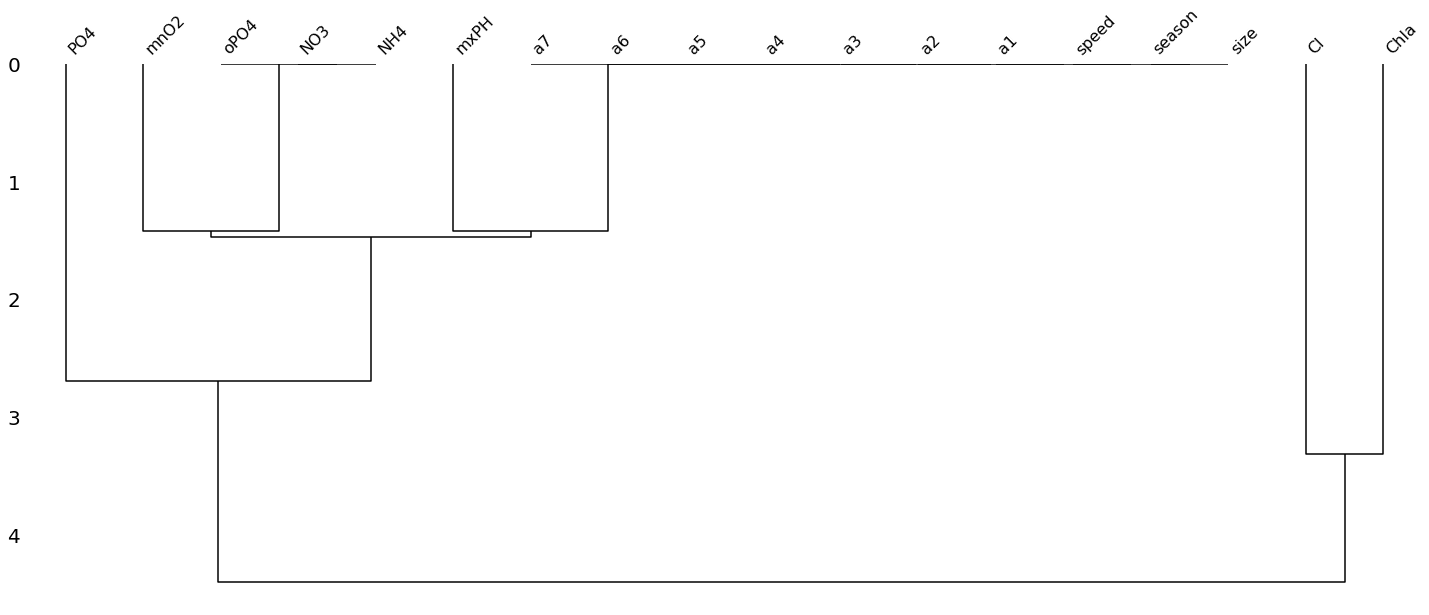

In [18]:
msno.dendrogram(data)

A dendrogram simply put is a tree diagram that groups simmilar objects in close branches. A missingness dendrogram describes the relationship between missing values by grouping similarly missing columns together.

We can further investigate the relationship between the missing values. Analyzing the missingness of a variable aginist another variable helps determine any relationships between missing and non-missing values.

We write a function which fills in dummy values in the DataFrame and we analyze the scatter plot to see if there is any correlation between the missing values

In [19]:
from numpy.random import rand

chla_null = data['Chla'].isnull()
num_nulls = chla_null.sum()

#Generate random values
dummy_values = rand(num_nulls)

# Shift to -2 (we do this to make sure the dummy values are always below or less than the actual values)
dummy_values = dummy_values -2

# Scale to 0.75 of Column Range
chla_range = data['Chla'].max() - data['Chla'].min()
dummy_values = dummy_values * 0.075 * chla_range


# shift to Column Minimum
dummy_values = (rand(num_nulls) -2) * 0.075 * chla_range + data['Chla'].min() 

In [20]:
def fill_dummy_values(df, scaling_factor):
    # create copy of data frame
    df_dummy = df.copy(deep=True)
    # Iterate over each column
    for col in df_dummy:
        
        # get column, column missing values and range
        col = df_dummy[col]
        col_null = col.isnull()
        num_nulls = col_null.sum()
        col_range = col.max() - col.min()
        
        # shift and scale dummy values
        dummy_values = (rand(num_nulls)-2)
        dummy_values = dummy_values * scaling_factor * col_range + col.min()
        
        # return dummy values
        col[col_null] = dummy_values
    return df_dummy
        

/Users/hananather/opt/anaconda3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:194: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  op=op_str, alt_op=unsupported[op_str]


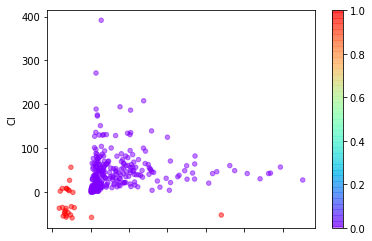

In [21]:
# create dummy dataframe
data_dummy = fill_dummy_values(data[['mxPH','mnO2','Cl','NO3','NH4','oPO4','PO4','Chla']],0.075)

# Get missing values of both columns for coloring 
nullity = data.Chla.isnull() +data.Cl.isnull()

# Generate Scatter plot
data_dummy.plot(x ='Chla', y = 'Cl', kind = 'scatter', alpha =0.5,
               c = nullity, cmap = 'rainbow')



NOTE:the above plot was inspired by Surja Donthi's online course dealing with mising values on DataCamp

In [22]:
corr = data[['mxPH','mnO2','Cl','NO3','NH4','oPO4','PO4','Chla']].corr()
corr.style.background_gradient(cmap='coolwarm')

,mxPH,mnO2,Cl,NO3,NH4,oPO4,PO4,Chla
mxPH,1,-0.127682,0.128934,-0.0414836,-0.0636838,0.133476,0.157461,0.380397
mnO2,-0.127682,1,-0.288312,0.0807361,-0.138695,-0.323415,-0.393988,-0.117143
Cl,0.128934,-0.288312,1,0.266112,0.0802032,0.296757,0.392256,0.128071
NO3,-0.0414836,0.0807361,0.266112,1,0.554875,0.138966,0.181622,0.157019
NH4,-0.0636838,-0.138695,0.0802032,0.554875,1,0.40951,0.396046,0.054269
oPO4,0.133476,-0.323415,0.296757,0.138966,0.40951,1,0.936118,0.0578009
PO4,0.157461,-0.393988,0.392256,0.181622,0.396046,0.936118,1,0.172919
Chla,0.380397,-0.117143,0.128071,0.157019,0.054269,0.0578009,0.172919,1


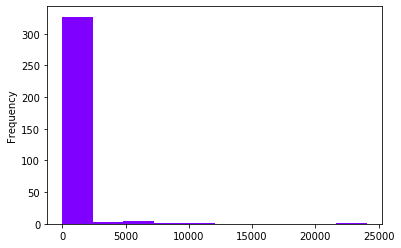

In [23]:
# go through the dataset
data.NH4.plot(x ='Chla', y = 'Cl', kind = 'hist',
            cmap = 'rainbow')

## Outliers

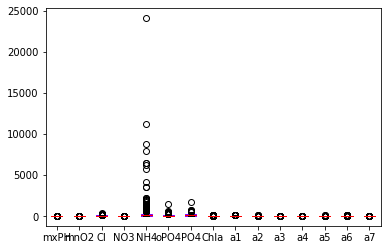

In [24]:
data.plot(kind = 'box',cmap = 'rainbow')

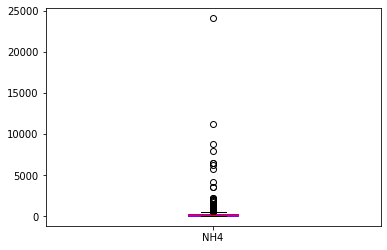

In [25]:
data.NH4.plot(kind = 'box',cmap = 'rainbow')

From the boxplot above we can see that there are a number of observations in the NH4 column which fall above the boxplot. If we were to assume that the underlying distribution of the values is normal( NOTE: this does not have to be the case but its frequent assumption which greatly simplifies performing analysis and building classification and regression models), then these values might be considered to be outliers. 

From summary statistics we know that the mean is 471.734411 and standard deviation is  1739.077458. Lets look at the values below one STD:

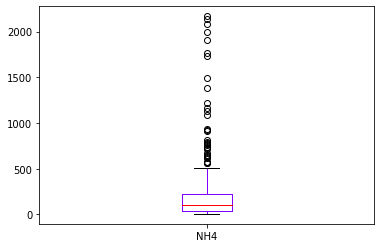

In [26]:
data[data.NH4 <471.734411 + 1739.077458].NH4.plot(kind = 'box',cmap = 'rainbow')

In [27]:
471.734411 + 1739.077458

2210.811869

In [28]:
# select values for with NH4 value is less than ~3400 and we are also keeping the NA
data_outliers_removed = data[(data.NH4 <2210.811869) | (data.NH4.isnull() == True)]

In [29]:
# looks like we droped the 11 outliers successfully
data_outliers_removed.shape

(329, 18)

#### Before Outlier Removal

In [30]:
data.NH4.describe()

count      338.000000
mean       471.734411
std       1739.077458
min          5.000000
25%         37.861250
50%        107.357000
75%        244.900002
max      24064.000000
Name: NH4, dtype: float64

#### After Outlier Removal

In [31]:
data_outliers_removed.NH4.describe()

count     327.000000
mean      219.129301
std       350.925308
min         5.000000
25%        36.750000
50%       103.000000
75%       226.300005
max      2167.370120
Name: NH4, dtype: float64

In [32]:
data = data_outliers_removed

### Dealing with Missing Values
Now that we have examined the missing values is some detail, we can now make more informed decision regarding how we handle the missing values. (whether to delete them or impute them)

In [33]:
# returns data frame with all the rows missing values
null_data = data[data.isnull().any(axis=1)]
null_data

,season,size,speed,mxPH,mnO2,Cl,NO3,NH4,oPO4,PO4,Chla,a1,a2,a3,a4,a5,a6,a7
27,autumn,small,high,6.80,11.10,9.000,0.630,20.00000,4.00000,NaN,2.700,30.3,1.9,0.0,0.0,2.1,1.4,2.1
37,spring,small,high,8.00,NaN,1.450,0.810,10.00000,2.50000,3.000,0.300,75.8,0.0,0.0,0.0,0.0,0.0,0.0
47,winter,small,low,NaN,12.60,9.000,0.230,10.00000,5.00000,6.000,1.100,35.5,0.0,0.0,0.0,0.0,0.0,0.0
54,winter,small,high,6.60,10.80,NaN,3.245,10.00000,1.00000,6.500,NaN,24.3,0.0,0.0,0.0,0.0,0.0,0.0
55,spring,small,medium,5.60,11.80,NaN,2.220,5.00000,1.00000,1.000,NaN,82.7,0.0,0.0,0.0,0.0,0.0,0.0
56,autumn,small,medium,5.70,10.80,NaN,2.550,10.00000,1.00000,4.000,NaN,16.8,4.6,3.9,11.5,0.0,0.0,0.0
57,spring,small,high,6.60,9.50,NaN,1.320,20.00000,1.00000,6.000,NaN,46.8,0.0,0.0,28.8,0.0,0.0,0.0
58,summer,small,high,6.60,10.80,NaN,2.640,10.00000,2.00000,11.000,NaN,46.9,0.0,0.0,13.4,0.0,0.0,0.0
59,autumn,small,medium,6.60,11.30,NaN,4.170,10.00000,1.00000,6.000,NaN,47.1,0.0,0.0,0.0,0.0,1.2,0.0
60,spring,small,medium,6.50,10.40,NaN,5.970,10.00000,2.00000,14.000,NaN,66.9,0.0,0.0,0.0,0.0,0.0,0.0


(327, 18)

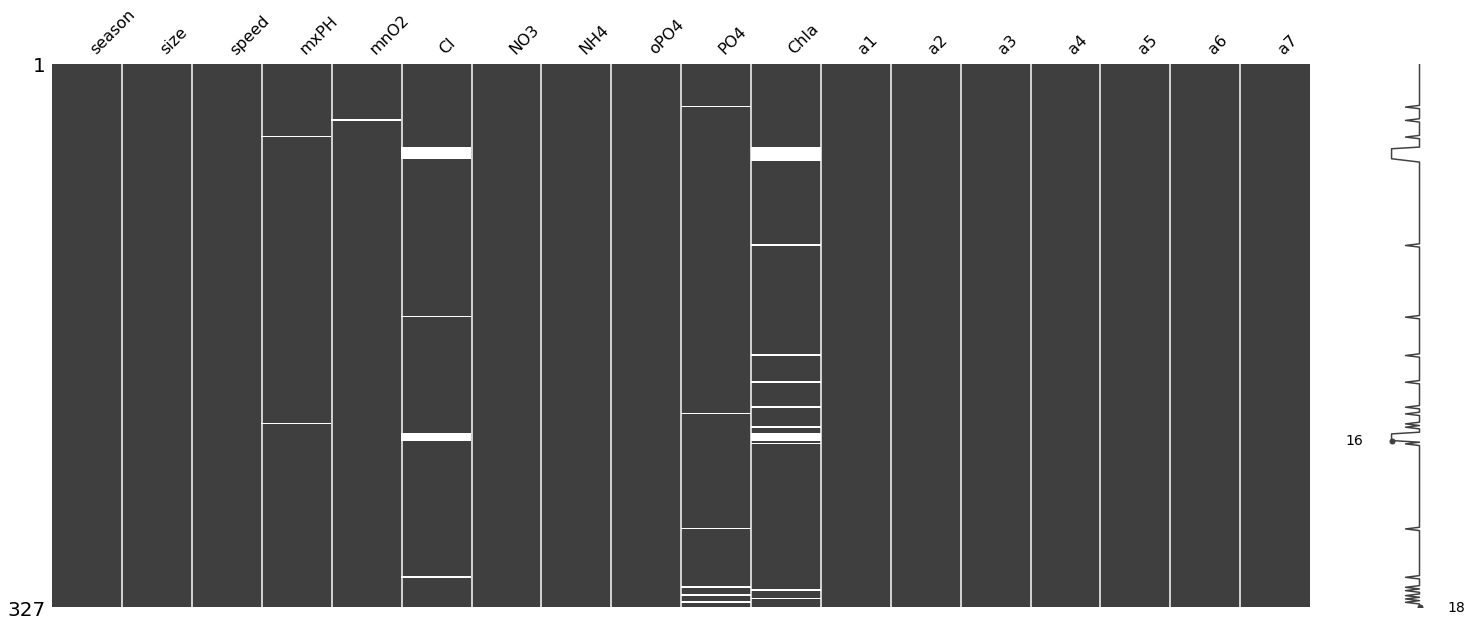

In [34]:
data_droped = data.copy(deep=True)
data_droped  = data_droped.drop(index = [61,198])
msno.matrix(data_droped)
data_droped.shape

As we can see the two row with the 6 missing values have been deleted. Trying to impute values for rows that contain too many missing values makes the dataset less accurate. 

The the most basic imputation techniques involve using statistics like mean, median, and mode fill in the missing values. 

### Comparing Imputation Techniques
The the most basic imputation techniques involve using statistics like mean, median, and mode fill in the missing values. Lets see how these techniques perform on our dataset.

#### Note:
- It is often suggest to scale the continuous variables in data before we impute we impute them 

#### Normalization Data

In [111]:
data_scaled = data_droped.copy(deep = True)
data_scaled.iloc[:, 3:11]

,mxPH,mnO2,Cl,NO3,NH4,oPO4,PO4,Chla
0,8.00,9.8,60.8000,6.238,578.00000,105.000,170.00000,50.000
1,8.35,8.0,57.7500,1.288,370.00000,428.750,558.75000,1.300
2,8.10,11.4,40.0200,5.330,346.66699,125.667,187.05701,15.600
3,8.07,4.8,77.3640,2.302,98.18200,61.182,138.70000,1.400
4,8.06,9.0,55.3500,10.416,233.70000,58.222,97.58000,10.500
...,...,...,...,...,...,...,...,...
335,8.12,10.2,7.6130,0.699,33.56000,28.034,49.65800,2.200
336,8.43,10.8,35.6420,6.225,134.00000,103.500,NaN,45.375
337,8.70,11.7,21.4656,3.765,91.45000,38.000,83.00000,17.000
338,8.10,8.2,26.5400,2.805,42.75000,48.500,88.12500,13.980


In [112]:
data_scaled.isnull().sum()

season     0
size       0
speed      0
mxPH       2
mnO2       1
Cl        14
NO3        0
NH4        0
oPO4       0
PO4        6
Chla      21
a1         0
a2         0
a3         0
a4         0
a5         0
a6         0
a7         0
dtype: int64

In [113]:
normalized_data

,season,size,speed,0,1,2,3,4,5,6,7,a1,a2,a3,a4,a5,a6,a7
0,winter,small,medium,-0.010275,0.259789,0.424557,1.407056,1.024209,0.522872,0.412708,2.041839,0.0,0.0,0.0,0.0,34.2,8.3,0.0
1,spring,small,medium,0.593772,-0.536141,0.355699,-0.730897,0.430581,4.723540,4.030606,-0.641253,1.4,7.6,4.8,1.9,6.7,0.0,2.1
2,autumn,small,medium,0.162310,0.967283,-0.044578,1.014882,0.363990,0.791027,0.571448,0.146595,3.3,53.6,1.9,0.0,0.0,0.0,9.7
3,spring,small,medium,0.110534,-1.951127,0.798511,-0.292940,-0.345181,-0.045669,0.121414,-0.635744,3.1,41.0,18.9,0.0,1.4,0.0,1.4
4,autumn,small,medium,0.093276,-0.093957,0.301516,3.211574,0.041584,-0.084075,-0.261269,-0.134386,9.2,2.9,7.5,0.0,7.5,4.1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
322,autumn,small,high,0.196827,0.436663,-0.776209,-0.985291,-0.529610,-0.475765,-0.707254,-0.591668,23.2,0.0,0.0,0.0,27.6,11.1,0.0
323,winter,small,high,0.731840,0.701973,-0.143417,1.401441,-0.242957,0.503409,NaN,1.787027,74.2,0.0,0.0,3.7,0.0,0.0,0.0
324,spring,small,high,1.197819,1.099938,-0.463468,0.338943,-0.364394,-0.346456,-0.396957,0.223727,13.0,8.6,1.2,3.5,1.2,1.6,1.9
325,summer,medium,high,0.162310,-0.447704,-0.348907,-0.075690,-0.503382,-0.210218,-0.349261,0.057342,4.1,0.0,0.0,0.0,9.2,10.1,0.0


In [114]:
from sklearn import preprocessing
data_scaled_continous = preprocessing.scale(data_scaled.iloc[:, 3:11])
data_scaled_continous = pd.DataFrame(data_scaled_continous)
data_scaled_continous

,0,1,2,3,4,5,6,7
0,-0.010275,0.259789,0.424557,1.407056,1.024209,0.522872,0.412708,2.041839
1,0.593772,-0.536141,0.355699,-0.730897,0.430581,4.723540,4.030606,-0.641253
2,0.162310,0.967283,-0.044578,1.014882,0.363990,0.791027,0.571448,0.146595
3,0.110534,-1.951127,0.798511,-0.292940,-0.345181,-0.045669,0.121414,-0.635744
4,0.093276,-0.093957,0.301516,3.211574,0.041584,-0.084075,-0.261269,-0.134386
...,...,...,...,...,...,...,...,...
322,0.196827,0.436663,-0.776209,-0.985291,-0.529610,-0.475765,-0.707254,-0.591668
323,0.731840,0.701973,-0.143417,1.401441,-0.242957,0.503409,NaN,1.787027
324,1.197819,1.099938,-0.463468,0.338943,-0.364394,-0.346456,-0.396957,0.223727
325,0.162310,-0.447704,-0.348907,-0.075690,-0.503382,-0.210218,-0.349261,0.057342


the **scale** function places continuous variables on unit scale by subtracting the mean of the variable and dividing the result by the variable’s standard deviation (also sometimes called z-scoring or simply scaling). The result is that the values in the transformed variable have the same relationship to one another as in the untransformed variable, but the transformed variable has mean 0 and standard deviation 1 (Source: scikit-learn documentation for sklearn.preprocessing)

#### Bit of Data Wrangling 
Now lets combine our scaled data back with the rest of the data and apply imputation.

In [129]:
# need to re-index the data so all of the data frame have the same index
new_index = np.arange(327)

#re-indexing the first 3 columns
temp1 = data_scaled.iloc[:, 0:3]
temp1 = temp1.reset_index()
del temp1['index']

#re-indexing columns 11-18
temp2 = data_scaled.iloc[:, 11:18]
temp2 = temp2.reset_index()
del temp2['index']

# combining the 3 data frames together 
normalized_data = pd.concat([temp1,data_scaled_continous,temp2],axis =1)
normalized_data

,season,size,speed,0,1,2,3,4,5,6,7,a1,a2,a3,a4,a5,a6,a7
0,winter,small,medium,-0.010275,0.259789,0.424557,1.407056,1.024209,0.522872,0.412708,2.041839,0.0,0.0,0.0,0.0,34.2,8.3,0.0
1,spring,small,medium,0.593772,-0.536141,0.355699,-0.730897,0.430581,4.723540,4.030606,-0.641253,1.4,7.6,4.8,1.9,6.7,0.0,2.1
2,autumn,small,medium,0.162310,0.967283,-0.044578,1.014882,0.363990,0.791027,0.571448,0.146595,3.3,53.6,1.9,0.0,0.0,0.0,9.7
3,spring,small,medium,0.110534,-1.951127,0.798511,-0.292940,-0.345181,-0.045669,0.121414,-0.635744,3.1,41.0,18.9,0.0,1.4,0.0,1.4
4,autumn,small,medium,0.093276,-0.093957,0.301516,3.211574,0.041584,-0.084075,-0.261269,-0.134386,9.2,2.9,7.5,0.0,7.5,4.1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
322,summer,medium,high,0.196827,0.436663,-0.776209,-0.985291,-0.529610,-0.475765,-0.707254,-0.591668,18.1,1.7,2.0,0.0,1.7,5.9,0.0
323,winter,large,low,0.731840,0.701973,-0.143417,1.401441,-0.242957,0.503409,NaN,1.787027,1.1,3.9,2.1,0.0,3.9,4.6,2.3
324,winter,large,low,1.197819,1.099938,-0.463468,0.338943,-0.364394,-0.346456,-0.396957,0.223727,0.0,4.7,0.0,0.0,2.6,2.6,0.0
325,summer,large,low,0.162310,-0.447704,-0.348907,-0.075690,-0.503382,-0.210218,-0.349261,0.057342,0.0,12.0,1.7,0.0,2.7,0.0,0.0


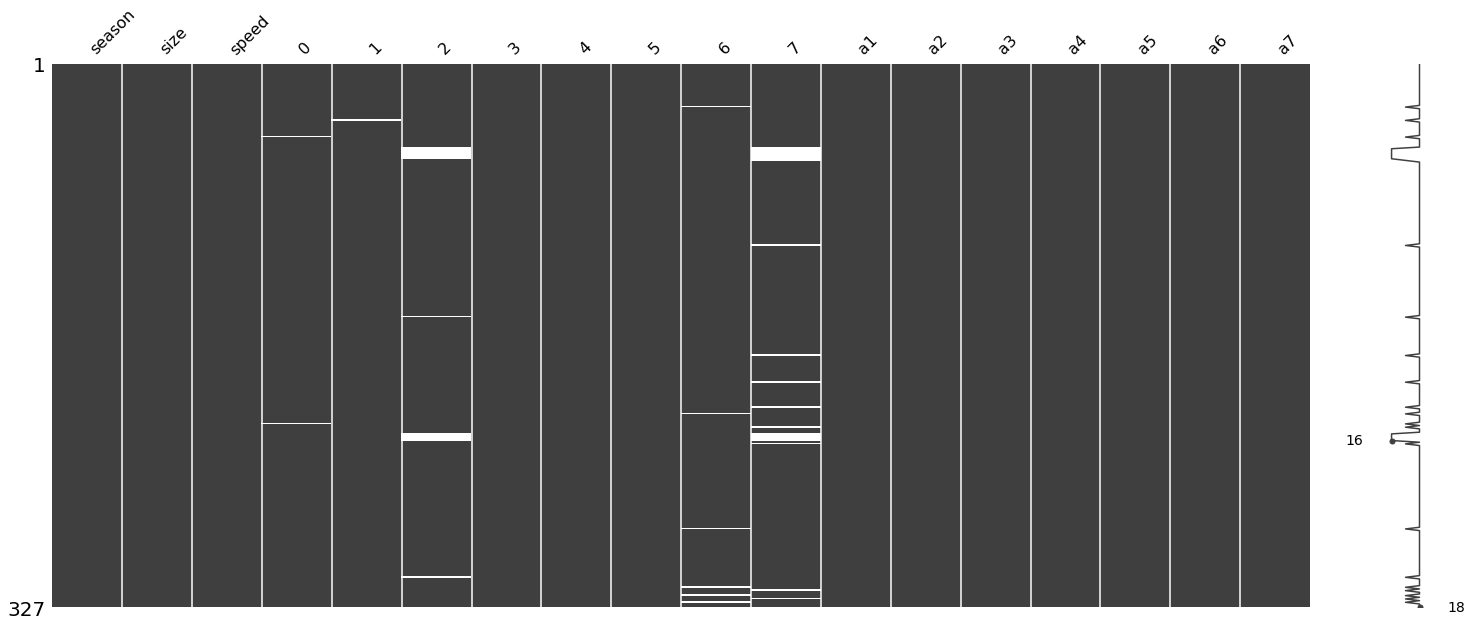

In [127]:
msno.matrix(normalized_data)

Success! after a little bit of data wrangling we normalized all of our continuous variables and we are now ready to impute the missing values!

#### Back to Imputation

In [35]:
from sklearn.preprocessing import Imputer

In [130]:
data_mean_impute= normalized_data.copy(deep = True) 
mean_imputer = Imputer(strategy= 'mean')
data_mean_impute.iloc[:,3:11] = mean_imputer.fit_transform(data_mean_impute.iloc[:,3:11])

/Users/hananather/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [37]:
data_droped_median= data_droped.copy(deep = True) 
median_imputer = Imputer(strategy= 'median')
data_droped_median.iloc[:,3:11] = median_imputer.fit_transform(data_droped_median.iloc[:,3:11])

/Users/hananather/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [38]:
data_droped_mode= data_droped.copy(deep = True) 
mode_imputer = Imputer(strategy= 'most_frequent')
data_droped_mode.iloc[:,3:11] = mode_imputer.fit_transform(data_droped_mode.iloc[:,3:11])


/Users/hananather/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


/Users/hananather/opt/anaconda3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:194: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  op=op_str, alt_op=unsupported[op_str]


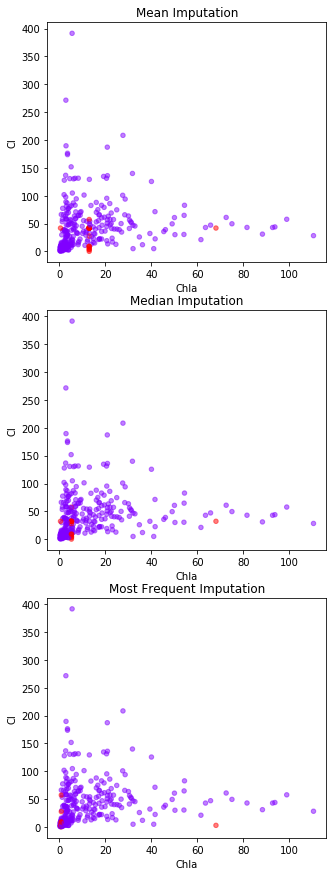

In [39]:
fig, axes = plt.subplots(nrows = 3 , ncols = 1, figsize = (5,15))
nullity = data_droped['Chla'].isnull() +data_droped['Cl'].isnull()

imputations = {'Mean Imputation' : data_droped_mean,
              'Median Imputation' : data_droped_median,
              'Most Frequent Imputation': data_droped_mode}

for ax, df_key in zip(axes.flatten(),imputations):
    imputations[df_key].plot(x ='Chla', y = 'Cl', kind = 'scatter', alpha =0.5,
               c = nullity, cmap = 'rainbow', ax = ax, colorbar = False, title =df_key)

### Advanced Imputation Techniques
The imputation techniques we have used thus far such as mean, median and mode imputation, only the respective column for computing and imputing the missing values. In contrast the advanced imputation techniques use other columns aswell to compute the missing values. We can think of advanced imputation technques as fitting a machine learning model to predict the missing values in a column using the remaining columns. 
For this project we use two of the most well-known imputation techniques: 

(1) K-Nearest Neighbours or KNN 

(2) Multiple Imputation by Chained Equations or MICE

#### K-Nearest Neighbours 
The KNN imputation technique uses the 'nearest neighbour' algorithm to impute the missing value; it finds the most similar data points by using the non-missing features, and calculates the average of these data points to fill in the missing value. K-Nearest Neighbors approach is among the simplest machine learning algorithms (Harrison,2018). 
K specifies the number of similar or 'nearest' points to consider.  

In [40]:
from fancyimpute import KNN
knn_imputer = KNN()

In [41]:
data_droped_knn= data_droped.copy(deep = True) 
data_droped_knn.iloc[:,3:11] = knn_imputer.fit_transform(data_droped_knn.iloc[:,3:11])

Imputing row 1/327 with 0 missing, elapsed time: 0.031
Imputing row 101/327 with 0 missing, elapsed time: 0.031
Imputing row 201/327 with 0 missing, elapsed time: 0.032
Imputing row 301/327 with 0 missing, elapsed time: 0.033


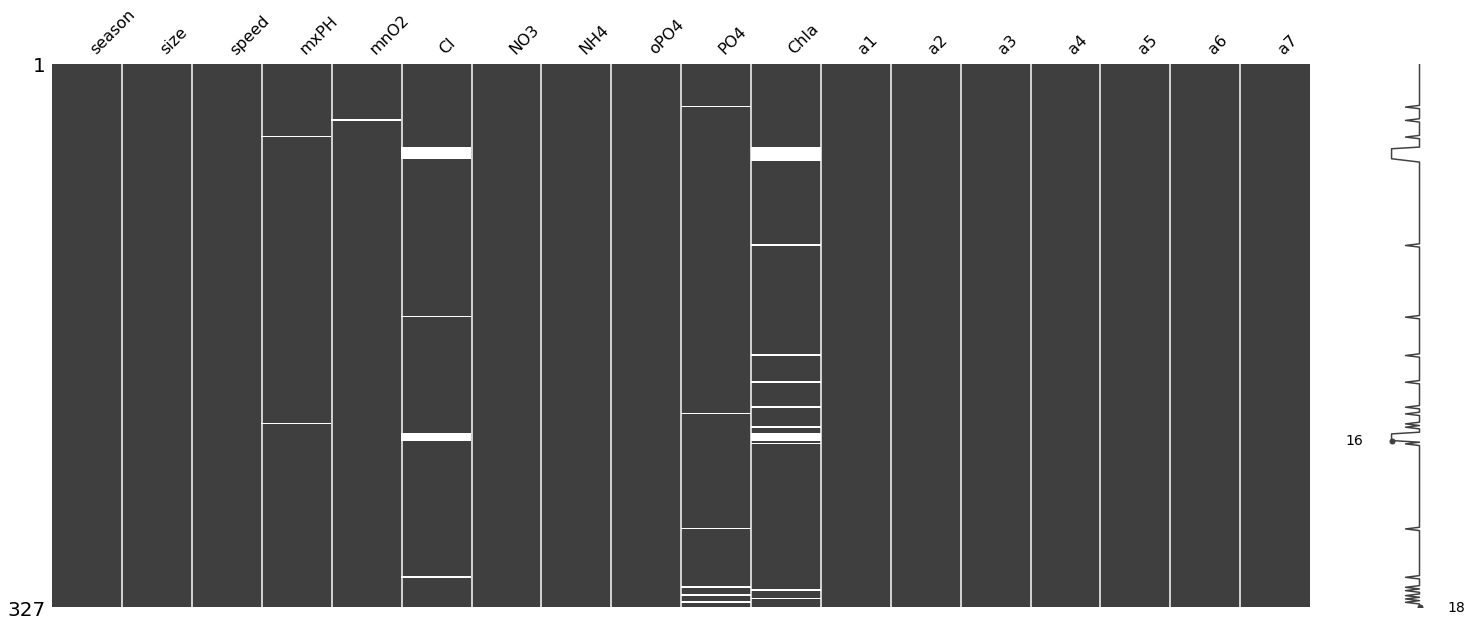

In [42]:
msno.matrix(data_droped)

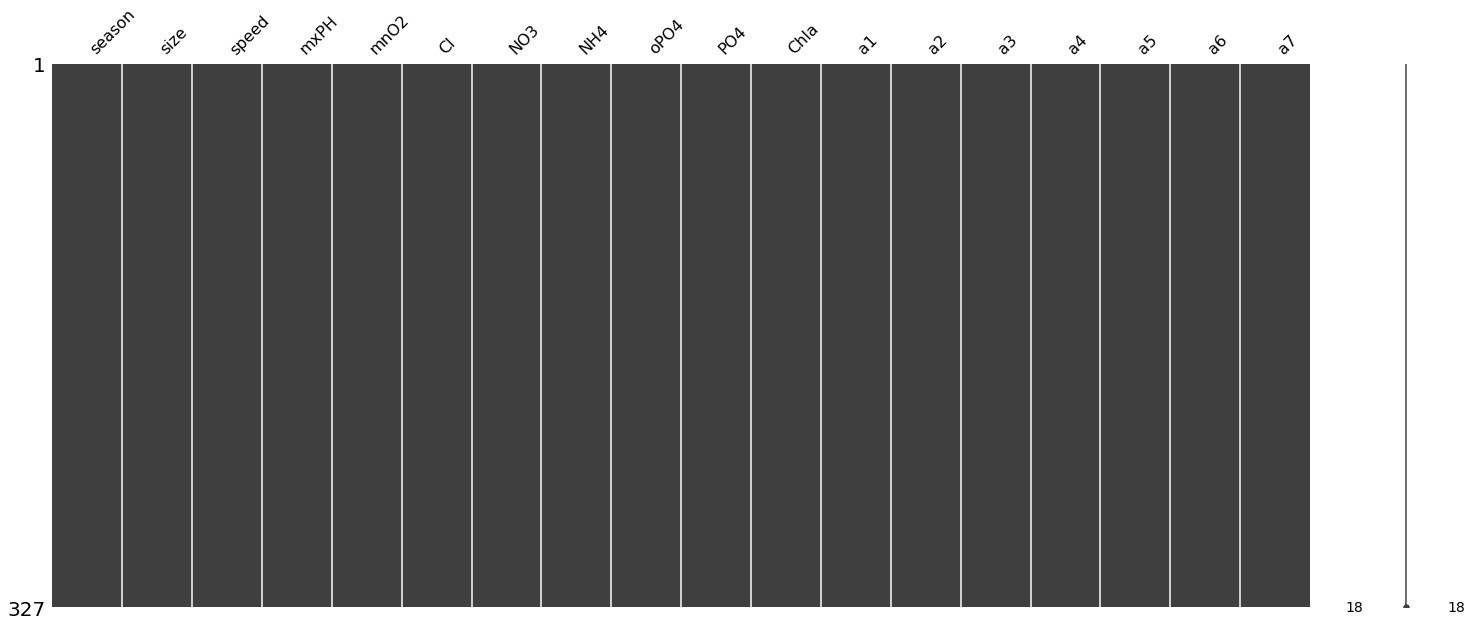

In [43]:
msno.matrix(data_droped_knn)

/Users/hananather/opt/anaconda3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:194: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  op=op_str, alt_op=unsupported[op_str]


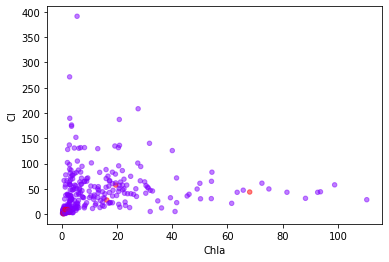

In [44]:
nullity = data_droped['Chla'].isnull() +data_droped['Cl'].isnull()
data_droped_knn.plot(x ='Chla', y = 'Cl', kind = 'scatter', alpha =0.5,
               c = nullity, cmap = 'rainbow', colorbar = False)

In [45]:
from fancyimpute import IterativeImputer
MICE_imputer = IterativeImputer()

In [46]:
data_droped_MICE = data_droped.copy(deep = True) 
data_droped_MICE.iloc[:,3:11] = MICE_imputer.fit_transform(data_droped_MICE.iloc[:,3:11])

/Users/hananather/opt/anaconda3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:194: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  op=op_str, alt_op=unsupported[op_str]


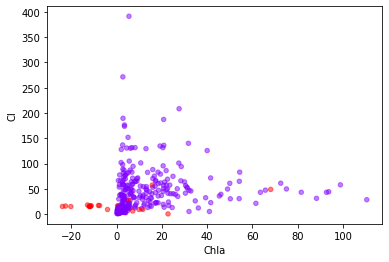

In [47]:
nullity = data_droped['Chla'].isnull() +data_droped['Cl'].isnull()
data_droped_MICE.plot(x ='Chla', y = 'Cl', kind = 'scatter', alpha =0.5,
               c = nullity, cmap = 'rainbow', colorbar = False)

In [48]:
data_droped_MICE.Chla.unique()

array([ 50.        ,   1.3       ,  15.6       ,   1.4       ,
        10.5       ,  28.4       ,   3.2       ,   6.9       ,
         5.544     ,   0.8       ,   0.6       ,  41.        ,
         0.5       ,   0.3       ,   1.1       ,   0.4       ,
        16.        ,   7.6       ,   1.7       ,   1.5       ,
         3.        ,   2.7       ,   4.9       ,   2.8       ,
         5.8       ,   3.6       ,   0.2       ,  12.32      ,
         8.957     ,   3.7       ,  13.2       ,  22.5       ,
        11.84      ,   3.9       ,   3.3       ,  12.1       ,
         7.9       ,   4.5       , -11.84076112, -23.87536743,
       -22.48093972, -11.59529858, -11.18082449, -12.09194153,
       -12.78424675,   3.10015636,   1.        ,   2.5       ,
        10.        ,  13.1       ,   5.2       ,  11.6       ,
        20.87      ,  13.        ,  18.37      ,   2.        ,
         4.3       ,  21.        ,   3.1       ,   2.9       ,
        40.        ,   3.5       ,   7.3       ,  31.  

### Binarizing Data


In [49]:
# creating a copy of the data set
data_final= data_droped_knn.copy(deep = True) 

In [50]:
 data_final.shape

(327, 18)

In [51]:
 data_final[['a1']].shape

(327, 1)

In [52]:
from sklearn.preprocessing import Binarizer
transformer = Binarizer()
# values values equal to 0 are maped to 0, otherwise values greater than 0 are mapped to 1
a1 = transformer.fit_transform(data_final[['a1']])
a2 = transformer.fit_transform(data_final[['a2']])

In [53]:
data_binary = data_droped_knn.copy(deep = True) 
data_binary = data_binary.iloc[:, 0:11]
data_binary = data_binary.assign(a1 =a1)
data_binary = data_binary.assign(a2 =a2)
data_binary.head()

,season,size,speed,mxPH,mnO2,Cl,NO3,NH4,oPO4,PO4,Chla,a1,a2
0,winter,small,medium,8.00,9.8,60.800,6.238,578.00000,105.000,170.00000,50.0,0.0,0.0
1,spring,small,medium,8.35,8.0,57.750,1.288,370.00000,428.750,558.75000,1.3,1.0,1.0
2,autumn,small,medium,8.10,11.4,40.020,5.330,346.66699,125.667,187.05701,15.6,1.0,1.0
3,spring,small,medium,8.07,4.8,77.364,2.302,98.18200,61.182,138.70000,1.4,1.0,1.0
4,autumn,small,medium,8.06,9.0,55.350,10.416,233.70000,58.222,97.58000,10.5,1.0,1.0


In [54]:
 data_binary_dummy= data_droped_knn.copy(deep = True) 

In [55]:
data_binary_dummy.shape

(327, 18)

In [56]:
data_binary_dummy = data_binary_dummy.iloc[:, 0:11]
data_binary_dummy= pd.get_dummies(data_binary_dummy)

In [57]:
data_binary_dummy.head()

,mxPH,mnO2,Cl,NO3,NH4,oPO4,PO4,Chla,season_autumn,season_spring,season_summer,season_winter,size_large,size_medium,size_small,speed_high,speed_low,speed_medium
0,8.00,9.8,60.800,6.238,578.00000,105.000,170.00000,50.0,0,0,0,1,0,0,1,0,0,1
1,8.35,8.0,57.750,1.288,370.00000,428.750,558.75000,1.3,0,1,0,0,0,0,1,0,0,1
2,8.10,11.4,40.020,5.330,346.66699,125.667,187.05701,15.6,1,0,0,0,0,0,1,0,0,1
3,8.07,4.8,77.364,2.302,98.18200,61.182,138.70000,1.4,0,1,0,0,0,0,1,0,0,1
4,8.06,9.0,55.350,10.416,233.70000,58.222,97.58000,10.5,1,0,0,0,0,0,1,0,0,1


In [58]:
data_binary_dummy = data_binary_dummy.assign(a1 =a1)

In [59]:
data_binary_dummy = data_binary_dummy.assign(a2 =a2)

In [60]:
data_binary_dummy.head()

,mxPH,mnO2,Cl,NO3,NH4,oPO4,PO4,Chla,season_autumn,season_spring,season_summer,season_winter,size_large,size_medium,size_small,speed_high,speed_low,speed_medium,a1,a2
0,8.00,9.8,60.800,6.238,578.00000,105.000,170.00000,50.0,0,0,0,1,0,0,1,0,0,1,0.0,0.0
1,8.35,8.0,57.750,1.288,370.00000,428.750,558.75000,1.3,0,1,0,0,0,0,1,0,0,1,1.0,1.0
2,8.10,11.4,40.020,5.330,346.66699,125.667,187.05701,15.6,1,0,0,0,0,0,1,0,0,1,1.0,1.0
3,8.07,4.8,77.364,2.302,98.18200,61.182,138.70000,1.4,0,1,0,0,0,0,1,0,0,1,1.0,1.0
4,8.06,9.0,55.350,10.416,233.70000,58.222,97.58000,10.5,1,0,0,0,0,0,1,0,0,1,1.0,1.0


In [61]:
 data_binary_dummy.iloc[:, 0:18]

,mxPH,mnO2,Cl,NO3,NH4,oPO4,PO4,Chla,season_autumn,season_spring,season_summer,season_winter,size_large,size_medium,size_small,speed_high,speed_low,speed_medium
0,8.00,9.8,60.8000,6.238,578.00000,105.000,170.00000,50.000,0,0,0,1,0,0,1,0,0,1
1,8.35,8.0,57.7500,1.288,370.00000,428.750,558.75000,1.300,0,1,0,0,0,0,1,0,0,1
2,8.10,11.4,40.0200,5.330,346.66699,125.667,187.05701,15.600,1,0,0,0,0,0,1,0,0,1
3,8.07,4.8,77.3640,2.302,98.18200,61.182,138.70000,1.400,0,1,0,0,0,0,1,0,0,1
4,8.06,9.0,55.3500,10.416,233.70000,58.222,97.58000,10.500,1,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335,8.12,10.2,7.6130,0.699,33.56000,28.034,49.65800,2.200,0,0,1,0,0,1,0,1,0,0
336,8.43,10.8,35.6420,6.225,134.00000,103.500,185.50731,45.375,0,0,0,1,1,0,0,0,1,0
337,8.70,11.7,21.4656,3.765,91.45000,38.000,83.00000,17.000,0,0,0,1,1,0,0,0,1,0
338,8.10,8.2,26.5400,2.805,42.75000,48.500,88.12500,13.980,0,0,1,0,1,0,0,0,1,0


In [62]:
from sklearn.model_selection import train_test_split
X_train_a1, X_test_a1, y_train_a1, y_test_a1 = train_test_split(
    data_binary_dummy.iloc[:, 0:18],data_binary_dummy['a1'] , test_size=0.20)

In [63]:
from sklearn.model_selection import train_test_split
X_train_a2, X_test_a2, y_train_a2, y_test_a2 = train_test_split(
    data_binary_dummy.iloc[:, 0:18],data_binary_dummy['a2'] , test_size=0.20)

In [64]:
y_test_a2.shape

(66,)

In [65]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred_a1 = gnb.fit(X_train_a1, y_train_a1).predict(X_test_a1)

In [66]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred_a2 = gnb.fit(X_train_a2, y_train_a2).predict(X_test_a2)

In [67]:
 print("Number of mislabeled points out of a total %d points : %d"
    % (X_test.shape[0], (y_test_a1 != y_pred_a1).sum()))

NameError: name 'X_test' is not defined

In [ ]:
 print("Number of mislabeled points out of a total %d points : %d"
    % (X_test.shape[0], (y_test_a2 != y_pred_a2).sum()))

## Decision Trees (DTs)

Dts are a non-parametric supervised learning method that can be used both for classification and regression. Dts are a model that predict the value of a given target variable ( this case the presence or absence of harmful algae in the water sample) by learning simple decision rules inferred from the features of training data.

### Some things we should be aware off:

- One advantage of using decision trees is it is possible to validate the model using statistical tests, which allows us account for reliability of the model

- "white box model" which essentially means that for a any given outcome we can see the trace the (boolean) logic behind the models decision ( in contrast to artificial neural networks )

- However  decision trees can make biased models if some classes in the data set dominate (need to balance the dataset)

- can be unstable due to small changes in the data might result in completely different trees being generated (this can be overcome with using ensemble 


(T. Hastie, R. Tibshirani and J. Friedman. Elements of Statistical Learning, Springer, 2009.)

In [ ]:
from sklearn import tree
model_tree = tree.DecisionTreeClassifier()
model_tree = model_tree.fit(X_train_a1, y_train_a1)
y_pred_tree = model_tree.predict(X_test_a1)

In [ ]:
 print("Number of mislabeled points out of a total %d points : %d"
    % (X_test.shape[0], (y_test_a1 != y_pred_tree).sum()))

NOTE:

If look at the visual diagram below can see that the decision tree is quite complex. Sklearn documentation strongly advises to performing dimensionality reduction (PCA, ICA, or Feature selection) beforehand. Which is why we will return to this example again after we have performed dimension reduction. 

In [ ]:
import graphviz 
dot_data = tree.export_graphviz(model_tree, out_file=None) 
graph = graphviz.Source(dot_data) 
graph

### Parameter Tuning
Parameters are arguments passed to the classifier before we construct it, and in many situations they have a huge impact on the the accuracy of the classifier. 
Lets try to play around with the parameters to see if we can improve the performance of the decision tree. 


In [ ]:
# we change minimum number of samples required to split an internal node to 200
model_tree = tree.DecisionTreeClassifier(min_samples_split = 150)
model_tree = model_tree.fit(X_train_a1, y_train_a1)
y_pred_tree = model_tree.predict(X_test_a1)
print("Number of mislabeled points out of a total %d points : %d"
        % (X_test.shape[0], (y_test_a1 != y_pred_tree).sum()))

In [ ]:
dot_data = tree.export_graphviz(model_tree, out_file=None) 
graph = graphviz.Source(dot_data) 
graph

### Data Impurity and Entropy
The idea of entropy is very important when it comes to understanding decision trees. 

$$
entropy  = \sum_{i} -p_i log_2(p_i)
$$
Lets unpack this formula: $\space p_i$ is the fraction of examples in class $i$ and then we sum over all the classes that are available. 

By this definition if all our examples are of the same class then the entropy is obviously 0.
On the other extreme, if the examples are evenly split between all the possible classes, then entropy is equal to its mathematical maximum value of 1

Taking it back to Decision trees, too see how entropy effects how a decision tree draws its boundaries we need to define **information gain** 
$$
information\space gain =  entropy \space (parent) - [weighted]entropy\space(children)
$$

***Decision tree algorithm maximizes the information gain***

So this is how the algorithm choses which feature to make the split on and in the case if a feature has many different values this is how the algorithm figures out where to make the split.



*Source: (from lesson 5 of Introduction to Machine Learning Class by Katie Malone and Sebastian Thrun taught on udacity for free)*

If we look at the documentation of the sklearn code we see that the algorithm uses **gini impurity** istead of   information gain which is a different metric choosing the *best* model (boundaries)

**Implementing Decision Tree using the Information Gain metric**

In [ ]:
model_tree = tree.DecisionTreeClassifier(criterion="entropy",min_samples_split =150)
model_tree = model_tree.fit(X_train_a1, y_train_a1)
y_pred_tree = model_tree.predict(X_test_a1)
print("Number of mislabeled points out of a total %d points : %d"
    % (X_test.shape[0], (y_test_a1 != y_pred_tree).sum()))

In [ ]:
dot_data = tree.export_graphviz(model_tree, out_file=None) 
graph = graphviz.Source(dot_data) 
graph

## Bias- Variance Dilemma

A high bias machine learning algorithm is one that practically just ignores the data, it almost has no capacity to learn anything. On the other extreme, we can build an algorithm that is extremely perceptive to data and can *only* replicate stuff its seen before. This would be an extremely high variance algorithm, and the problem with that is, it will react extremely poorly in situations it has not seen before because it doesn't have the right bias to generalize to new data.

So we want an algorithm that in the middle, that it has come authority to generalize but is still open to listening to data. 

## Support Vector Machine (SVM)

The intuition behind SVM is, the algorithm finds a hyperplane between the different classes of data. The "best" hyperplane is found by maximizing the distance distance to the nearest point which is also called **margin**. Margin is the the distance between the line and nearest point of either of the classes. 

In [ ]:
from sklearn import svm
model_svm = svm.SVC(gamma='scale')
y_pred_svm_a1 = model_svm.fit(X_train_a1, y_train_a1).predict(X_test_a1)

In [ ]:
print("Number of mislabeled points out of a total %d points : %d"
        % (X_test.shape[0], (y_test_a1 != y_pred_svm_a1).sum()))

In [ ]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_pred_svm_a1, y_test_a1)
acc

the **gamma parameter** defines how much influence a single training example reaches. Low values means sample points which are far away from the decision boundary will have in fitting the boundary and conversely, and high values implies that only training points which are close to the decision boundary will have an influence on the fit. 

In [ ]:
model_svm = svm.SVC(kernel='linear')
y_pred_svm_a1 = model_svm.fit(X_train_a1, y_train_a1).predict(X_test_a1)

In [ ]:
print("Number of mislabeled points out of a total %d points : %d"
        % (X_test.shape[0], (y_test_a1 != y_pred_svm_a1).sum()))

In [ ]:
from sklearn.linear_model import LogisticRegression
y_pred_logistic_a1 = LogisticRegression(random_state=0).fit(X_train_a1, y_train_a1).predict(X_test_a1)

In [ ]:
print("Number of mislabeled points out of a total %d points : %d"
        % (X_test.shape[0], (y_test_a1 != y_pred_logistic_a1).sum()))

In [ ]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1).fit(X_train_a1, y_train_a1).predict(X_test_a1)

In [ ]:
print("Number of mislabeled points out of a total %d points : %d"
        % (X_test.shape[0], (y_test_a1 != y_pred_logistic_a1).sum()))

# Rescaling Data


1) rescaling the continuous variables

In [68]:
data_binary_dummy.iloc[:, 0:8]

,mxPH,mnO2,Cl,NO3,NH4,oPO4,PO4,Chla
0,8.00,9.8,60.8000,6.238,578.00000,105.000,170.00000,50.000
1,8.35,8.0,57.7500,1.288,370.00000,428.750,558.75000,1.300
2,8.10,11.4,40.0200,5.330,346.66699,125.667,187.05701,15.600
3,8.07,4.8,77.3640,2.302,98.18200,61.182,138.70000,1.400
4,8.06,9.0,55.3500,10.416,233.70000,58.222,97.58000,10.500
...,...,...,...,...,...,...,...,...
335,8.12,10.2,7.6130,0.699,33.56000,28.034,49.65800,2.200
336,8.43,10.8,35.6420,6.225,134.00000,103.500,185.50731,45.375
337,8.70,11.7,21.4656,3.765,91.45000,38.000,83.00000,17.000
338,8.10,8.2,26.5400,2.805,42.75000,48.500,88.12500,13.980


In [69]:
from sklearn import preprocessing
X_scaled = preprocessing.scale(data_binary_dummy.iloc[:, 0:8])
X_scaled = pd.DataFrame(X_scaled)
X_scaled

,0,1,2,3,4,5,6,7
0,-0.005660,0.258348,0.461525,1.407056,1.024209,0.522872,0.421162,2.121795
1,0.598417,-0.538420,0.392118,-0.730897,0.430581,4.723540,4.050906,-0.620535
2,0.166933,0.966586,-0.011352,1.014882,0.363990,0.791027,0.580423,0.184708
3,0.115155,-1.954895,0.838461,-0.292940,-0.345181,-0.045669,0.128915,-0.614904
4,0.097896,-0.095771,0.337503,3.211574,0.041584,-0.084075,-0.255021,-0.102477
...,...,...,...,...,...,...,...,...
322,0.201452,0.435407,-0.748817,-0.985291,-0.529610,-0.475765,-0.702466,-0.569855
323,0.736492,0.700996,-0.110979,1.401441,-0.242957,0.503409,0.565953,1.861358
324,1.202495,1.099380,-0.433582,0.338943,-0.364394,-0.346456,-0.391153,0.263543
325,0.166933,-0.449890,-0.318107,-0.075690,-0.503382,-0.210218,-0.343302,0.093484


Now we just need merge this scaled data frame with the other (binary) variables which  should not be normalized scaled. 

In [ ]:
new_index = np.arange(327)
temp = data_binary_dummy.iloc[:, 8:20]
temp = temp.reindex(new_index)
normalized_data = pd.concat([X_scaled,temp],axis =1)
normalized_data

Lets perform PCA on the normalized data.

# Feature Scaling and Selection 
*"Everything should be made as simple as possible, but not simpler."*
-Albert Einstein

Why might we want to get rid of feature?
- it's noisy 
- it causes overfitting 
- it is strongly related (highly correlated) with a feature already present 
- additional features slow down training/testing process

One important thing to keep in mind is that **Features** and **Information** are ***two*** different things. What we really want out of our data is information to draw conclusions and have insights. Strictly speaking this is not the same thing as having lots of features. "Features are attempting to *access* information" which is not exactly the same thing as information. Therefore the goal is to find the bare minimum number of features that can provide us with as much information as possible.

In [ ]:
from sklearn.decomposition import PCA